In [17]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [18]:
img = cv2.imread('Image/ChatGPT.jpg')

In [19]:
img.shape

(369, 657, 3)

In [20]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

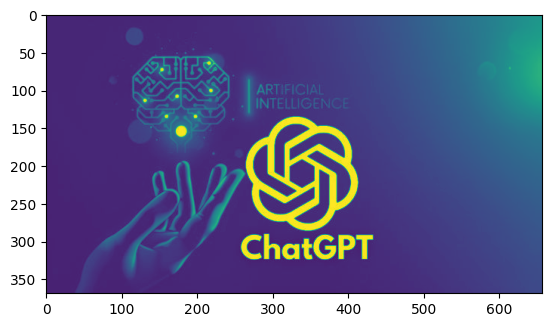

In [21]:
plt.imshow(gray_img)
plt.show()

In [22]:
sift = cv2.SIFT_create()
kp, des = sift.detectAndCompute(gray_img, None)

In [23]:
img_with_keypoints = cv2.drawKeypoints(gray_img, kp, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

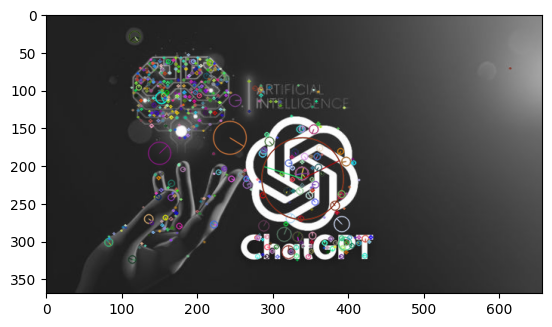

In [24]:
plt.imshow(img_with_keypoints)
plt.show()

In [25]:
angle = 60
M = cv2.getRotationMatrix2D((gray_img.shape[1]/2, gray_img.shape[0]/2), angle, 1)

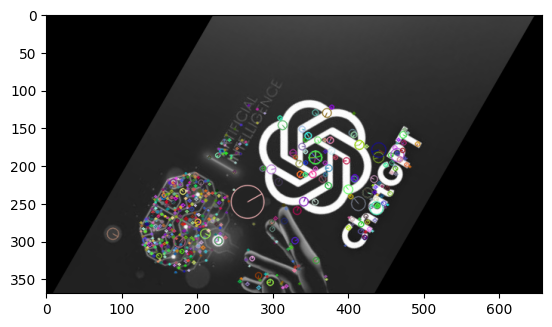

In [27]:
img_rotated = cv2.warpAffine(gray_img, M, (img.shape[1], img.shape[0]))

#gray = cv2.cvtColor(img_rotated, cv2.COLOR_BGR2GRAY)
sift = cv2.SIFT_create()
kp,des2 = sift.detectAndCompute(img_rotated, None)

img_kp = cv2.drawKeypoints(img_rotated, kp, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)


plt.imshow(img_kp)

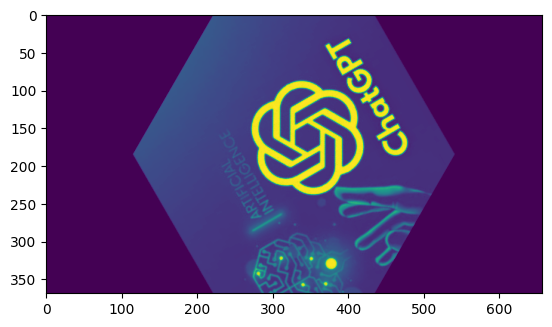

In [30]:
sift = cv2.SIFT_create()
kp1, desc1 = sift.detectAndCompute(gray_img, None)
kp2, desc2 = sift.detectAndCompute(img_rotated, None)

bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = bf.match(desc1, desc2)

src_pts = np.float32([kp1[m.queryIdx].pt for m in matches]).reshape(-1,1,2)
dst_pts = np.float32([kp2[m.trainIdx].pt for m in matches]).reshape(-1,1,2)

M, mask = cv2.estimateAffinePartial2D(src_pts, dst_pts, method=cv2.RANSAC, ransacReprojThreshold=5.0)

img_aligned = cv2.warpAffine(img_rotated, M, (gray_img.shape[1], gray_img.shape[0]))
plt.imshow(img_aligned)